In [592]:
%load_ext autoreload

%autoreload 2
from experiments import *
import numpy as np
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [635]:
data = get_data()
X1 = data[np.where(data[:,-1] == 1)].astype(float)
X2 = data[np.where(data[:,-1] == 0)].astype(float)
X1 = X1[:,:-1].T
X2 = X2[:,:-1].T


In [570]:
x1_dist,x2_dist = parzen_window_intervals(X1,X2,1,200)

0


the summ of x1_dist is 1.0
The sample mean for x1, first dimension is 0.14156474820143886
The sample varience for x1, first dimension is 7.753105853100263
The sample mean for x2, first dimension is 0.13130368098159512
The sample varience for x2, first dimension is 6.648997123653663
the summ of x1_dist is 1.0
The sample mean for x1, first dimension is 0.002829781573904088
The sample varience for x1, first dimension is 0.16954071912215177
The sample mean for x2, first dimension is 0.0025291554889404246
The sample varience for x2, first dimension is 0.17951910317291453
the summ of x1_dist is 1.0
The sample mean for x1, first dimension is 0.335704964847394
The sample varience for x1, first dimension is 44.41873246192324
The sample mean for x2, first dimension is 0.32288343558282206
The sample varience for x2, first dimension is 41.06898396440934
the summ of x1_dist is 1.0
The sample mean for x1, first dimension is 0.44333755975739864
The sample varience for x1, first dimension is 77.748065

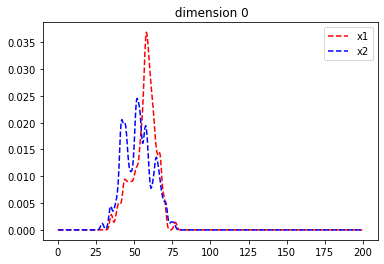

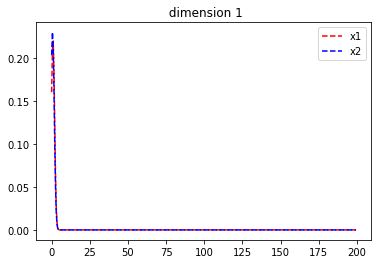

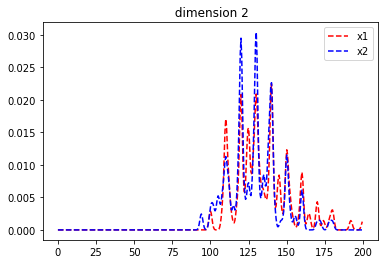

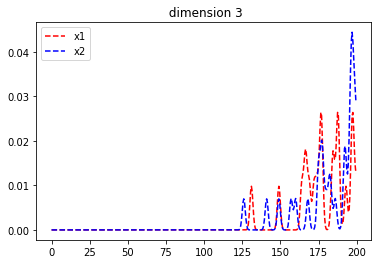

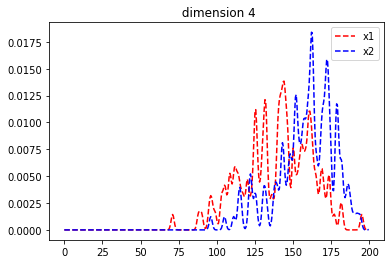

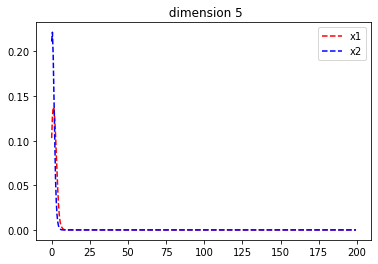

In [571]:
plot_univariate_prob(x1_dist,x2_dist,200)

In [636]:
x1 = X1.T
x1 = np.append(x1,np.zeros((len(x1),1)),axis = 1)
x2 = X2.T
x2 = np.append(x2,np.ones((len(x2),1)),axis = 1)
X = np.append(x1,x2,axis = 0)
np.random.seed(0)
np.random.shuffle(X)

In [253]:
print(X)

[[ 46.    1.  101.  ... 156.    0.    1. ]
 [ 58.    0.  150.  ... 162.    1.    1. ]
 [ 48.    1.  124.  ... 175.    0.    1. ]
 ...
 [ 52.    1.  128.  ... 156.    1.    0. ]
 [ 39.    1.  118.  ... 140.    1.2   0. ]
 [ 51.    1.  125.  ... 125.    1.4   1. ]]


In [559]:
clf = MaximumLiklihood()

In [560]:
clf.train(X1,X2)

In [556]:
sigma1,sigma2,mu1,mu2 = clf.get_mu_sigma()

In [561]:
print(f"The mean for x1 is \n {mu1}")
print(f"The covariance for x1 is \n {sigma1}")

The mean for x1 is 
 [ 56.62589928   0.82014388 134.56834532 251.47482014 139.25899281
   1.57410072]
The covariance for x1 is 
 [[ 6.25650846e+01 -4.41385021e-01  3.58888774e+01  4.50121629e+01
  -2.30110243e+01  1.01261322e+00]
 [-4.41385021e-01  1.47507893e-01 -2.16396667e+00 -4.43978055e+00
  -7.01619999e-01 -3.48739713e-02]
 [ 3.58888774e+01 -2.16396667e+00  3.49741732e+02  1.32643807e+02
   6.02546452e+00  2.81615858e+00]
 [ 4.50121629e+01 -4.43978055e+00  1.32643807e+02  2.43132850e+03
   5.80065214e+01 -1.20352984e+00]
 [-2.30110243e+01 -7.01619999e-01  6.02546452e+00  5.80065214e+01
   5.06781844e+02 -6.42494695e+00]
 [ 1.01261322e+00 -3.48739713e-02  2.81615858e+00 -1.20352984e+00
  -6.42494695e+00  1.68450908e+00]]


In [514]:
first_classifier,second_classifier,points = get_points_6dimensions(clf.a,clf.b,clf.c,1,200,150,1.8)

[-255.768619417635, 5.24613756070082]
[-254.799992969907, 5.30552466980128]
[-253.830266597194, 5.36381185391688]
[-252.859428655005, 5.42098746855628]
[-251.887467304889, 5.47703967526768]
[-250.914370509944, 5.53195643715166]
[-249.940126030205, 5.58572551424053]
[-248.964721417875, 5.63833445873907]
[-247.988144012429, 5.68977061012132]
[-247.010380935558, 5.74002109007846]
[-246.031419085963, 5.78907279731225]
[-245.051245133991, 5.83691240216777]
[-244.069845516094, 5.88352634109984]
[-243.087206429133, 5.92890081096650]
[-242.103313824481, 5.97302176314327]
[-241.118153401960, 6.01587489745056]
[-240.131710603569, 6.05744565588799]
[-239.143970607020, 6.09771921616699]
[-238.154918319059, 6.13668048503445]
[-237.164538368575, 6.17431409137905]
[-236.172815099479, 6.21060437911081]
[-235.179732563346, 6.24553539980605]
[-234.185274511819, 6.27909090510702]
[-233.189424388750, 6.31125433886658]
[-232.192165322083, 6.34200882902781]
[-231.193480115454, 6.37133717922704]
[-230.193351

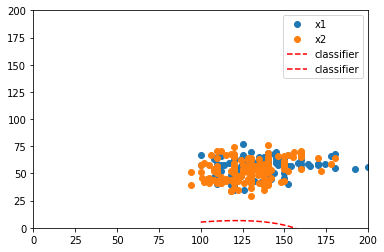

In [515]:
display_bayes_descriminate_func(X1,X2, first_classifier,second_classifier,points,200,2,0)

In [259]:
K_cross_validation(5,clf,X)

The accuracy for the ML in the 0 set is : 46.666666666666664
The accuracy for the ML in the 1 set is : 35.0
The accuracy for the ML in the 2 set is : 41.66666666666667
The accuracy for the ML in the 3 set is : 45.0
The accuracy for the ML in the 4 set is : 48.333333333333336
The average accuracy for the ML is 43.33333333333333


In [562]:
clf = Baysian(sigma1,sigma2,(sigma1+sigma2)/2,(mu1+mu2)/2)

In [563]:
clf.train(X1,X2)

In [568]:
first_classifier,second_classifier,points = get_points_6dimensions(clf.a,clf.b,clf.c,1,200,150,1.8)

[151.387052837287 - 76.9482799010136*I, 151.387052837287 + 76.9482799010136*I]
[152.671610227452 - 78.5909643984828*I, 152.671610227452 + 78.5909643984828*I]
[153.956167617616 - 80.1950155620624*I, 153.956167617616 + 80.1950155620624*I]
[155.240725007781 - 81.7627071926574*I, 155.240725007781 + 81.7627071926574*I]
[156.525282397946 - 83.2960922522899*I, 156.525282397946 + 83.2960922522899*I]
[157.809839788111 - 84.7970318589556*I, 157.809839788111 + 84.7970318589556*I]
[159.094397178275 - 86.2672195577928*I, 159.094397178275 + 86.2672195577928*I]
[160.37895456844 - 87.7082017768755*I, 160.37895456844 + 87.7082017768755*I]
[161.663511958605 - 89.1213951764151*I, 161.663511958605 + 89.1213951764151*I]
[162.948069348769 - 90.5081014495683*I, 162.948069348769 + 90.5081014495683*I]
[164.232626738934 - 91.8695200182135*I, 164.232626738934 + 91.8695200182135*I]
[165.517184129099 - 93.206758978657*I, 165.517184129099 + 93.206758978657*I]
[166.801741519263 - 94.5208445835678*I, 166.801741519263

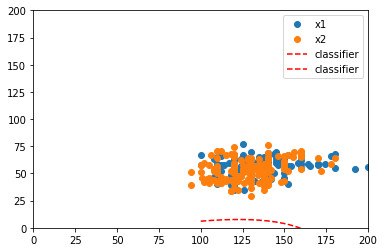

In [567]:
display_bayes_descriminate_func(X1,X2, first_classifier,second_classifier,points,200,2,0)

In [262]:
K_cross_validation(5,clf,X)

The accuracy for the Bayesian in the 0 set is : 45.0
The accuracy for the Bayesian in the 1 set is : 35.0
The accuracy for the Bayesian in the 2 set is : 55.00000000000001
The accuracy for the Bayesian in the 3 set is : 45.0
The accuracy for the Bayesian in the 4 set is : 48.333333333333336
The average accuracy for the Bayesian is 45.66666666666667


In [595]:
clf = Parzen_window(1)

In [596]:
K_cross_validation(5,clf,X)

The accuracy for the Parzen in the 0 set is : 71.66666666666667
The accuracy for the Parzen in the 1 set is : 61.66666666666667
The accuracy for the Parzen in the 2 set is : 71.66666666666667
The accuracy for the Parzen in the 3 set is : 70.0
The accuracy for the Parzen in the 4 set is : 66.66666666666666
The average accuracy for the Parzen is 68.33333333333333


In [597]:
clf = KNN(3)

In [598]:
K_cross_validation(5,clf,X)

The accuracy for the KNN in the 0 set is : 71.66666666666667
The accuracy for the KNN in the 1 set is : 60.0
The accuracy for the KNN in the 2 set is : 65.0
The accuracy for the KNN in the 3 set is : 65.0
The accuracy for the KNN in the 4 set is : 58.333333333333336
The average accuracy for the KNN is 64.0


In [637]:
clf = Perceptron(50,0.9)

In [638]:
K_cross_validation(5,clf,X)

The accuracy for the Perceptron in the 0 set is : 70.0
The accuracy for the Perceptron in the 1 set is : 70.0
The accuracy for the Perceptron in the 2 set is : 73.33333333333333
The accuracy for the Perceptron in the 3 set is : 76.66666666666667
The accuracy for the Perceptron in the 4 set is : 60.0
The average accuracy for the Perceptron is 70.0


display on x3 and x0

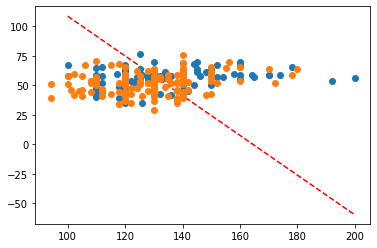

In [588]:
clf.display(1,200,150,1.8)

display on x0 and x3

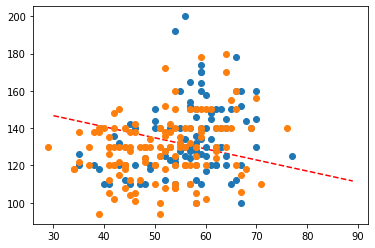

In [589]:
clf.display_x3(1,200,150,1.8)

In [601]:
clf = Ho_Kashyap(50,1)

In [602]:
K_cross_validation(5,clf,X)

Finished by maximum iterations
The accuracy for the Ho_Kashyap in the 0 set is : 81.66666666666667
Finished by maximum iterations
The accuracy for the Ho_Kashyap in the 1 set is : 73.33333333333333
Finished by maximum iterations
The accuracy for the Ho_Kashyap in the 2 set is : 75.0
Finished by maximum iterations
The accuracy for the Ho_Kashyap in the 3 set is : 76.66666666666667
Finished by maximum iterations
The accuracy for the Ho_Kashyap in the 4 set is : 65.0
The average accuracy for the Ho_Kashyap is 74.33333333333334


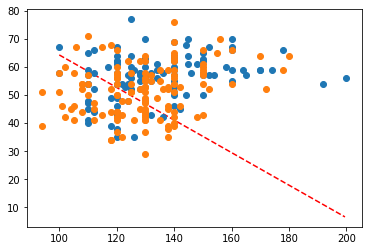

In [584]:
clf.display(1,200,150,1.8)

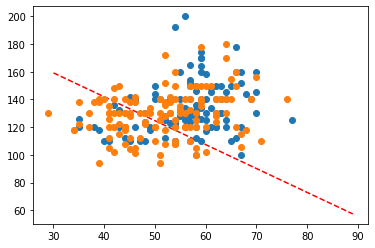

In [581]:
clf.display_x3(1,200,150,1.8)

In [603]:
clf = Fisher_descriminate()

In [604]:
K_cross_validation(5,clf,X)

The accuracy for the Fisher_descriminate in the 0 set is : 73.33333333333333
The accuracy for the Fisher_descriminate in the 1 set is : 65.0
The accuracy for the Fisher_descriminate in the 2 set is : 70.0
The accuracy for the Fisher_descriminate in the 3 set is : 61.66666666666667
The accuracy for the Fisher_descriminate in the 4 set is : 60.0
The average accuracy for the Fisher_descriminate is 66.0


[ 5.67390731e-04 -2.16164672e-03  9.41545465e-05  3.64592236e-05
 -3.14106979e-04  1.77752962e-03]


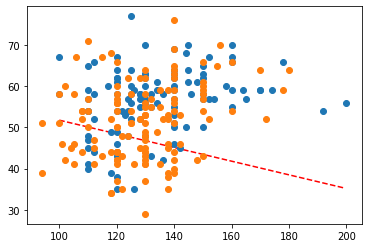

In [507]:
clf.display(1,200,150,1.8)

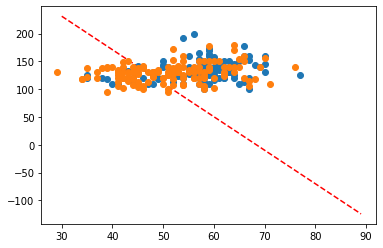

In [508]:
clf.display_x3(1,200,150,1.8)

In [605]:
w1, v1 = LA.eig(sigma1)
w2, v2 = LA.eig(sigma2)
X1_after,X2_after,sigma1_diag,sigma2_diag,mu1_diag,mu2_diag,v_z = diagonalize(X1,w1,v1,X2,w2,v2,sigma1,sigma2,mu1,mu2)

The sigma for x1 after digonalizing
[[ 2.44241933e+03  4.75882054e-13 -6.79777756e-13 -5.82360118e-13
  -2.35087010e-14 -1.71782931e-15]
 [ 4.75090325e-13  5.06451453e+02 -2.91737525e-13 -8.97977484e-14
  -2.16124751e-14  1.05665532e-14]
 [-6.84426863e-13 -2.91730049e-13  3.45189352e+02 -5.98547122e-14
   2.60376745e-15 -5.12500237e-15]
 [-5.80729895e-13 -8.71130115e-14 -5.21920840e-14  5.64875646e+01
   1.37164288e-15  7.70552877e-15]
 [-2.34953929e-14 -2.16422276e-14  2.63047929e-15  1.14901450e-15
   1.57471753e+00 -3.33498015e-15]
 [-1.76863158e-15  1.05660925e-14 -5.24585001e-15  7.70326315e-15
  -3.33318545e-15  1.26759661e-01]]
The sigma for x1 after converting to identitiy
[[ 1.00000000e+00  4.27878340e-16 -7.40334758e-16 -1.56785208e-15
  -3.79068055e-16 -9.76291166e-17]
 [ 4.27166475e-16  1.00000000e+00 -6.97741715e-16 -5.30909029e-16
  -7.65304494e-16  1.31878470e-15]
 [-7.45398024e-16 -6.97723833e-16  1.00000000e+00 -4.28640523e-16
   1.11679167e-16 -7.74773648e-16]
 [-1.56

In [616]:
x1 = X1_after.T
x1 = np.append(x1,np.zeros((len(x1),1)),axis = 1)
x2 = X2_after.T
x2 = np.append(x2,np.ones((len(x2),1)),axis = 1)
X = np.append(x1,x2,axis = 0)
np.random.seed(0)
np.random.shuffle(X)

In [617]:
clf = MaximumLiklihood()

In [618]:
clf.train(X1_after,X2_after)

In [619]:
sigma1,sigma2,mu1,mu2 = clf.get_mu_sigma()

In [620]:
K_cross_validation(5,clf,X)

The accuracy for the ML in the 0 set is : 46.666666666666664
The accuracy for the ML in the 1 set is : 35.0
The accuracy for the ML in the 2 set is : 41.66666666666667
The accuracy for the ML in the 3 set is : 45.0
The accuracy for the ML in the 4 set is : 48.333333333333336
The average accuracy for the ML is 43.33333333333333


AttributeError: 'MaximumLiklihood' object has no attribute 'display'

In [621]:
clf = Baysian(sigma1,sigma2,(sigma1+sigma2)/2,(mu1+mu2)/2)

In [622]:
K_cross_validation(5,clf,X)

The accuracy for the Bayesian in the 0 set is : 45.0
The accuracy for the Bayesian in the 1 set is : 35.0
The accuracy for the Bayesian in the 2 set is : 55.00000000000001
The accuracy for the Bayesian in the 3 set is : 45.0
The accuracy for the Bayesian in the 4 set is : 48.333333333333336
The average accuracy for the Bayesian is 45.66666666666667


In [623]:
clf = Parzen_window(1)

In [624]:
K_cross_validation(5,clf,X)

The accuracy for the Parzen in the 0 set is : 65.0
The accuracy for the Parzen in the 1 set is : 80.0
The accuracy for the Parzen in the 2 set is : 68.33333333333333
The accuracy for the Parzen in the 3 set is : 73.33333333333333
The accuracy for the Parzen in the 4 set is : 58.333333333333336
The average accuracy for the Parzen is 68.99999999999999


In [625]:
clf = KNN(3)

In [626]:
K_cross_validation(5,clf,X)

The accuracy for the KNN in the 0 set is : 73.33333333333333
The accuracy for the KNN in the 1 set is : 73.33333333333333
The accuracy for the KNN in the 2 set is : 68.33333333333333
The accuracy for the KNN in the 3 set is : 65.0
The accuracy for the KNN in the 4 set is : 70.0
The average accuracy for the KNN is 70.0


In [633]:
clf = Perceptron(50,0.9)

In [634]:
K_cross_validation(5,clf,X)

The accuracy for the Perceptron in the 0 set is : 75.0
The accuracy for the Perceptron in the 1 set is : 71.66666666666667
The accuracy for the Perceptron in the 2 set is : 71.66666666666667
The accuracy for the Perceptron in the 3 set is : 76.66666666666667
The accuracy for the Perceptron in the 4 set is : 71.66666666666667
The average accuracy for the Perceptron is 73.33333333333334


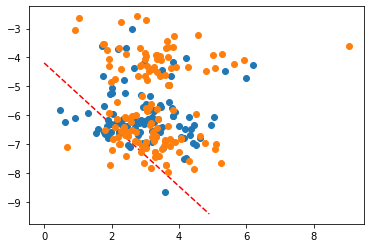

In [541]:
clf.display_(7,-5,6,-1)

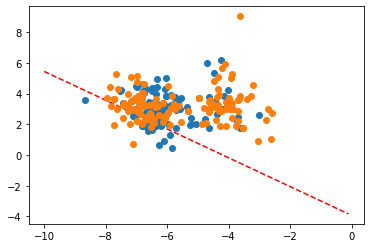

In [544]:
clf.display_x3(7,-5,6,-1)

In [629]:
clf = Ho_Kashyap(50,1)

In [630]:
K_cross_validation(5,clf,X)

Finished by maximum iterations
The accuracy for the Ho_Kashyap in the 0 set is : 81.66666666666667
Finished by maximum iterations
The accuracy for the Ho_Kashyap in the 1 set is : 73.33333333333333
Finished by maximum iterations
The accuracy for the Ho_Kashyap in the 2 set is : 75.0
Finished by maximum iterations
The accuracy for the Ho_Kashyap in the 3 set is : 76.66666666666667
Finished by maximum iterations
The accuracy for the Ho_Kashyap in the 4 set is : 65.0
The average accuracy for the Ho_Kashyap is 74.33333333333334


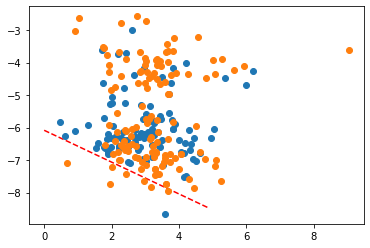

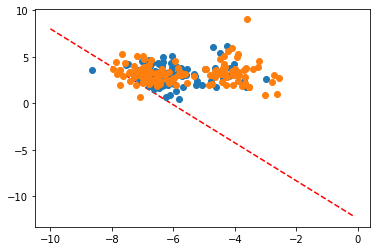

In [548]:
clf.display_x3(7,-5,6,-1)

In [631]:
clf = Fisher_descriminate()

In [632]:
K_cross_validation(5,clf,X)

The accuracy for the Fisher_descriminate in the 0 set is : 80.0
The accuracy for the Fisher_descriminate in the 1 set is : 63.33333333333333
The accuracy for the Fisher_descriminate in the 2 set is : 66.66666666666666
The accuracy for the Fisher_descriminate in the 3 set is : 65.0
The accuracy for the Fisher_descriminate in the 4 set is : 60.0
The average accuracy for the Fisher_descriminate is 67.0


[-0.0043954   0.00813035 -0.00314236  0.00230149 -0.00819335  0.00530297]


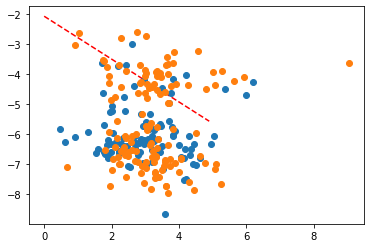

In [552]:
clf.display(7,-5,6,-1)

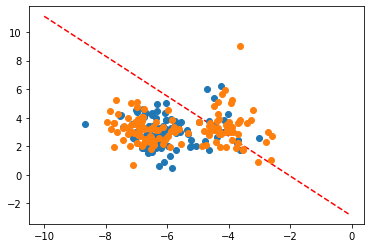

In [553]:
clf.display_x3(7,-5,6,-1)